In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df=pd.read_csv("abalone.csv")
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


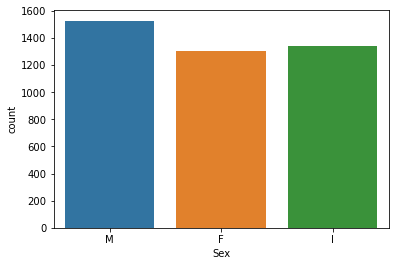

In [20]:
sns.countplot(x='Sex', data=df)

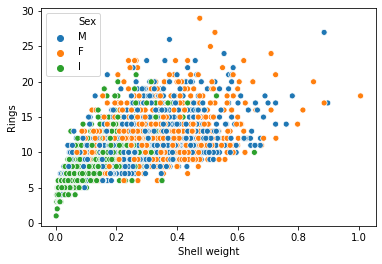

In [25]:
sns.scatterplot(x="Shell weight", y="Rings", data=df, hue="Sex")

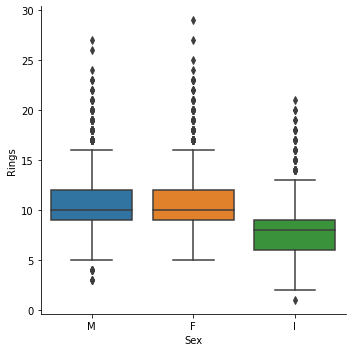

In [26]:
sns.catplot(x="Sex", y="Rings", data=df, kind='box')

In [29]:
df['IsAdult'] = [0 if x=='I' else 1 for x in df['Sex']]
data_tf = df.drop('Sex', axis=1)
data_tf.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,IsAdult
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0


In [30]:
X = data_tf.drop('Rings', axis=1)
y = data_tf['Rings'].values

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.svm import LinearSVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

classifiers = [
    SGDRegressor(),
    LinearSVR(),
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor()
]


In [37]:
from sklearn.model_selection import cross_val_score

for clf in classifiers:
    clf.fit(x_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    scores = cross_val_score(clf, x_train, y_train, scoring="neg_mean_squared_error", cv=10)
    rmse_scores = np.sqrt(-scores)
    
    print('****Results****')
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Std deviation: ", scores.std())
    
print("="*30)

SGDRegressor
****Results****
Scores:  [-4.96054771 -4.57832644 -6.31585734 -4.95301264 -5.73400408 -7.15484254
 -4.49855565 -4.06737785 -4.20826817 -4.4517791 ]
Mean:  -5.092257152881694
Std deviation:  0.951770135096453
LinearSVR
****Results****
Scores:  [-5.12760875 -4.53242892 -6.48614235 -4.98239612 -5.80392672 -6.92038287
 -4.75927563 -4.33079159 -4.21680743 -4.46444688]
Mean:  -5.16242072582617
Std deviation:  0.8899547840529215
LinearRegression
****Results****
Scores:  [-5.11438246 -4.54159714 -5.99742926 -4.88456167 -5.70132808 -7.0463493
 -4.46731433 -3.95194968 -4.02036032 -4.45640229]
Mean:  -5.0181674540997365
Std deviation:  0.9243846345945432
DecisionTreeRegressor
****Results****
Scores:  [ -9.27388535  -6.94585987  -9.29073482  -8.18210863 -10.06070288
 -11.38338658  -7.52715655  -6.64536741  -9.42492013  -8.72523962]
Mean:  -8.745936183634846
Std deviation:  1.3848367658651932
RandomForestRegressor
****Results****
Scores:  [-4.80118025 -4.38929904 -5.22578307 -4.7265856

In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

rnd_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rnd_reg, param_grid, cv=5, scoring="neg_mean_squared_error",
                          return_train_score=True)
grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [39]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 30}

In [44]:
best_reg = grid_search.best_estimator_
y_pred = best_reg.predict(x_test)
final_mse = mean_squared_error(y_test, y_pred)
final_rmse = np.sqrt(final_mse)
final_rmse

2.1899261892843684

In [41]:
for pred in range(0, len(y_pred)):
    print("Predicition: " + str(y_pred[pred]) + " Actual: " + str(y_test[pred]))

Predicition: 11.933333333333334 Actual: 9
Predicition: 9.3 Actual: 8
Predicition: 14.933333333333334 Actual: 16
Predicition: 11.4 Actual: 9
Predicition: 11.9 Actual: 14
Predicition: 10.033333333333333 Actual: 11
Predicition: 8.5 Actual: 7
Predicition: 8.266666666666667 Actual: 6
Predicition: 6.9 Actual: 7
Predicition: 10.1 Actual: 10
Predicition: 12.333333333333334 Actual: 22
Predicition: 8.466666666666667 Actual: 7
Predicition: 13.366666666666667 Actual: 15
Predicition: 6.666666666666667 Actual: 9
Predicition: 8.166666666666666 Actual: 8
Predicition: 13.166666666666666 Actual: 18
Predicition: 11.2 Actual: 11
Predicition: 10.966666666666667 Actual: 14
Predicition: 13.866666666666667 Actual: 13
Predicition: 7.8 Actual: 9
Predicition: 14.733333333333333 Actual: 20
Predicition: 10.333333333333334 Actual: 12
Predicition: 9.966666666666667 Actual: 12
Predicition: 10.3 Actual: 11
Predicition: 9.4 Actual: 10
Predicition: 7.633333333333334 Actual: 7
Predicition: 10.166666666666666 Actual: 11
P

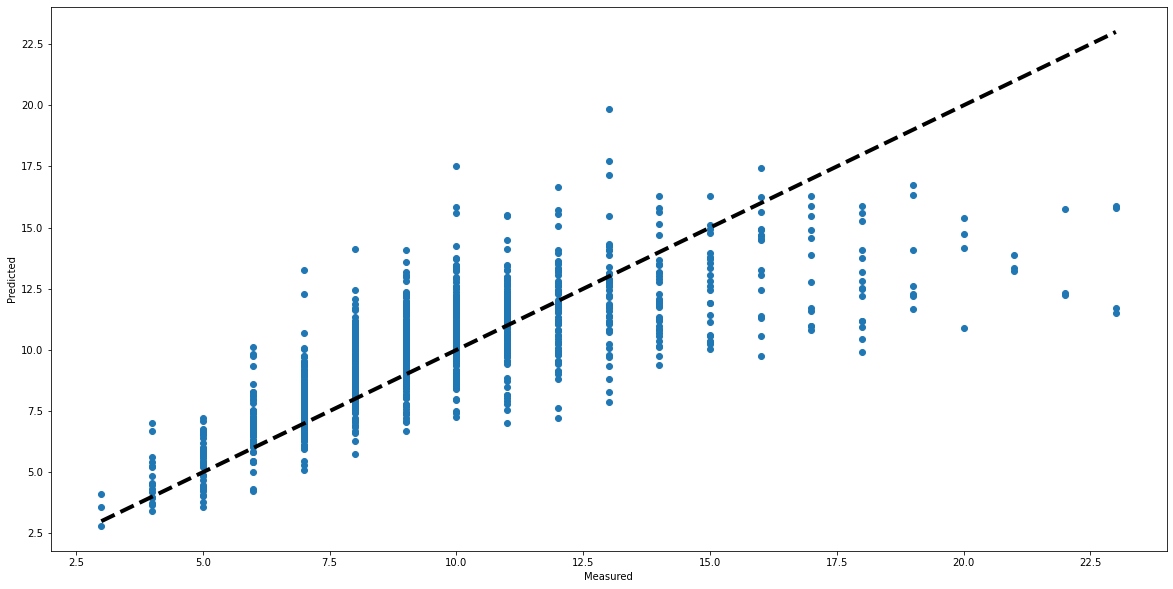

In [42]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [45]:
import pickle
filename="Abalone_Project"
pickle.dump(best_reg,open(filename,"wb"))